# An interactive lab notebook for exploring microbiome data
### Example data of soil bacterial community from a wetland restoration site. Metadata includes date, treatment, and block.

#### dependencies:
  * phylogenetic methods use [Biopython](http://biopython.org/wiki/Getting_Started)


####  files needed are:
  * A tree file, such as from FastTree
  * An OTU observation matrix, such as from RDP Classifier, in biom format
  * Sample metadata, which is *crucial* and you may have to create yourself for your own data


#### output will be
  * A bar plot of alpha diversity (still in beta..)
  * Within and between group diversity plots
  * PCoA plots on the group of your choice (from metadata file)
  * ANOSIM p-values based on grouping. Results!!!

#### See [this website](http://readiab.org/book/0.1.1/3/1) for useful information on microbiome analysis

#### Use [this flow chart](http://mb3is.megx.net/gustame) to help determine the propper statistical analysis for your data

#### To change colors in the figures as you like, see [this guide](http://matplotlib.org/api/pyplot_api.html)

### Table of Contents

* [Rarefaction](#rarefaction)

    * **TODO**: add rarefaction script from [R::vegan](https://cran.r-project.org/web/…) using [magic](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb), see [this](https://web.stanford.edu/class/bios221/labs/phyloseq/lab_phyloseq.html) tutorial


* [Producing a tree](#tree)
    * With scikit-bio
    * With Biopython


* [Alpha Diversity](#alphadiversity)

    * observed species
    * phylogenetic diversity

  
* [Beta Diversity - distance matricies](#betadiversity)
     * Bray Curtis
     * Phylogenetic


* [PCoA](#pcoa)

* [Statistics](#stats)



In [13]:
# imports
from skbio.diversity import *
import pandas as pd
import numpy as np
from IPython.display import display
from ipywidgets import widgets
import matplotlib.pyplot as plt
import os

In [3]:
# uploads

sample_md_f = '/Users/gracecagle/Dropbox/explore-microbiome/my_data/replanting-sample-md.txt'
otu_table_f = '/Users/gracecagle/Dropbox/explore-microbiome/my_data/replanting_otu_table.txt'
abundance_f = '/Users/gracecagle/Dropbox/explore-microbiome/my_data/replanting-abundance.txt'
tree_f = '/Users/gracecagle/Dropbox/explore-microbiome/my_data/replanting-tree.nwk'

In [4]:
# variables
sample_md = pd.read_csv(sample_md_f, sep='\t', index_col=0,  names = ["ID", "Date", "treatment", "block"])
otu_table = pd.read_csv(otu_table_f, sep='\t', index_col=0)
otu_ids = pd.Index.tolist(otu_table.index)
ids = list(otu_table)
abundance = np.loadtxt(abundance_f, dtype=int)
# todo: make abundance from OTU table instead of separate file for clarity

________
### <a name="rarefaction"></a> Rarefaction

* add rarefaction, probably using %R

_____
### <a name="tree"></a> Producing a rooted tree - required for phylogenetic analysis

##### Producing a tree with scikit bio
* error: OTUs are not matching tip names, perhaps IO issue

In [61]:
skb_tree = skbio.io.read(tree_f, format='newick', into=TreeNode)
skb_tree_rooted = skb_tree.root_at_midpoint()

##### Producing a tree with Biopython
  * trying due to OTU matching issue with scikit bio 

In [60]:
# import Bio
# from Bio import Phylo
# import pylab
# phylo_tree = Phylo.read('/Users/gracecagle/Dropbox/explore-microbiome/my_data/replanting-tree.nwk', 'newick')
# Phylo.draw_ascii(phylo_tree)
# rooted_tree = phylo_tree.root_with_outgroup('OTU_87581')
# Phylo.draw_graphviz()
# pylab.show()

##### Calculating pylogenetic diversity with PyCogent 
   * try if compatibility issues with skb continue

In [46]:
# from cogent.maths.unifrac.fast_unifrac import PD_whole_tree
# from cogent.parse.tree import DndParser
# from cogent.maths.unifrac.fast_tree import UniFracTreeNode
# tree_in = open(tree_f)
# pycogent_tree = DndParser(tree_in, UniFracTreeNode)

______
### <a name="alphadiversity"></a>Alpha Diversity

#### non-pylogenetic metrics do not require a tree file
* appropriate selections include observed otus, simpson, shannon, chao1, pielou

In [57]:
# drop-down menu
a_options = get_alpha_diversity_metrics()
a_display = widgets.Dropdown(options=a_options)
display(a_display, description='Select an alpha diversity metric')

groups = list(sample_md)
select_group = widgets.Dropdown(options=groups)
display(select_group, description='Select a group')

In [59]:
adiv = skbio.diversity.alpha_diversity(a_display.value, abundance, ids=otu_ids)
adiv.head()
# a_fig = sample_md.boxplot(column=)

OTU_0      NaN
OTU_1      NaN
OTU_10       1
OTU_100    NaN
OTU_1000     1
dtype: float64

#### pylogenetic metrics, use Newick tree file

In [77]:
# fig = sample_md.boxplot(column=a_display, by='')

_____
### <a name="betadiversity"></a>Beta Diversity

#### Phylogenetic metrics

* This does not currently work due to same tree format issue

In [45]:
# wu_dm = beta_diversity("weighted_unifrac", abundance.T, ids=ids, tree=skb_tree_rooted,
#                     otu_ids=otu_ids)

#### Non-phylogenetic metrics

In [19]:
bc_dm = beta_diversity("braycurtis", abundance.T, ids)
print(bc_dm)

90x90 distance matrix
IDs:
'b1_Jp_Nov14', 'b1_Jp_May15', 'b1_Jp_Jun14', 'b1_Jm_Nov14', 'b1_Jm_May15', ...
Data:
[[ 0.          0.65532405  0.6209821  ...,  0.70264894  0.61051199
   0.58035808]
 [ 0.65532405  0.          0.65961679 ...,  0.72055282  0.621715
   0.62611245]
 [ 0.6209821   0.65961679  0.         ...,  0.66202492  0.61721286
   0.59815726]
 ..., 
 [ 0.70264894  0.72055282  0.66202492 ...,  0.          0.70966391
   0.68160402]
 [ 0.61051199  0.621715    0.61721286 ...,  0.70966391  0.          0.55878966]
 [ 0.58035808  0.62611245  0.59815726 ...,  0.68160402  0.55878966  0.        ]]


In [17]:
# alternative beta diversity metrics
# from scipy.spatial.distance import euclidean, pdist

______
### <a name="pcoa"></a>PCoA - select sample grouping below

In [68]:
b_options = list(sample_md)
b_display = widgets.Dropdown(options=b_options, description = "group samples by")
display(b_display)

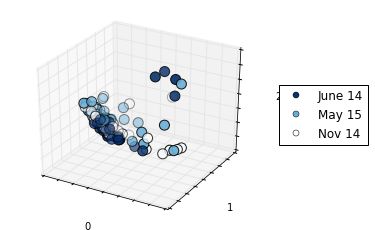

In [66]:
from skbio.stats.ordination import pcoa
pcoa_results = pcoa(bc_dm)
%matplotlib inline
fig = pcoa_results.plot(df=sample_md,
                       column = b_display.value,
                       cmap="Blues",
                       s=100)

_____
### <a name="stats"></a> Stats - ANOSIM
* p-value is calculated from above grouping selection

In [67]:
from skbio.stats.distance import anosim
results = anosim(bc_dm, sample_md, column=b_display.value, permutations=999)
results['test statistic']

display(results)

method name                 ANOSIM
test statistic name              R
sample size                     90
number of groups                 3
test statistic            0.106175
p-value                      0.001
number of permutations         999
Name: ANOSIM results, dtype: object

In [74]:
# save figure
fig.savefig('sample.png')
print('File saved to: ', os.getcwd())
fig.show()

File saved to:  /Users/gracecagle


//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


_______
### Cluster by grouping

In [71]:
# from scipy.cluster.hierarchy import average, dendrogram
# lm = average(dm.condensed_form())